# Drug Review Analysis [Part-3]

### Team 10:
- Krishna Koushik Parimi
- Ravi Tarun Prasad Nimmalapudi
- Naveen Kumar Pallanti

## Regression Analysis!

- In this part for "Regression Analysis" we have built a workflow for applying a machine learning model to predict drug ratings based on review texts which covers data preprocessing, model training and evaluation and generating predictions.

- The code for the same is included in this notebook below.

#### Importing required libraries!

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.preprocessing import PolynomialFeatures

# Libraries required for building the prediction model.
import pandas as pd
import numpy as np
import evaluate
import tensorflow as tf
from transformers import AutoTokenizer
from transformers import DataCollatorWithPadding
from transformers import TFAutoModelForSequenceClassification
from transformers import create_optimizer
from transformers import pipeline
from transformers.pipelines.pt_utils import KeyDataset
from transformers.keras_callbacks import KerasMetricCallback
from datasets import Dataset
from tqdm.auto import tqdm

In [19]:
df = pd.read_csv("C://Users//rtpn2//OneDrive//Desktop//WinterQ24//Machine Learning//Project//drugReviewAnalysis//drugReviewAnalysis//predicted_test.csv")
df['reviewLen'] = df['review'].apply(lambda x: len(x))

- Checking the pairwise relationships between left over variables.

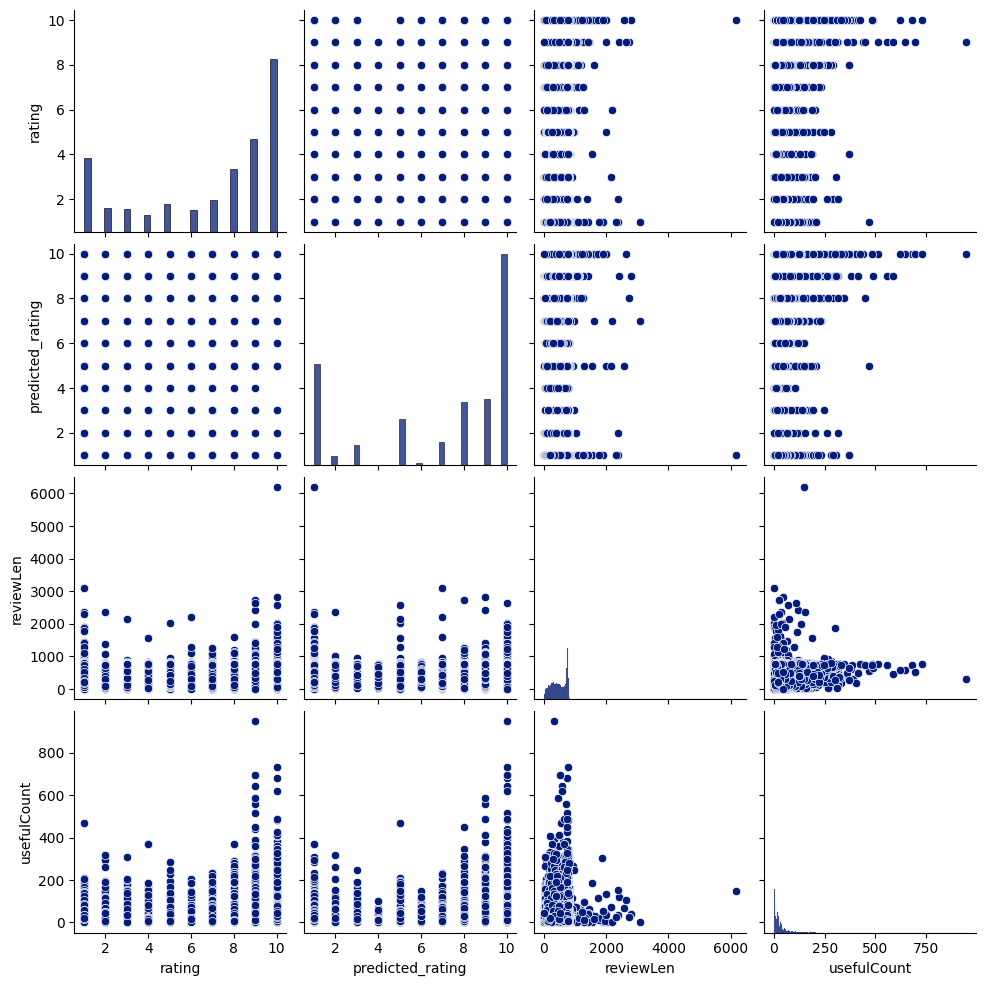

In [20]:
 sns.pairplot(df[['rating', 'predicted_rating', 'reviewLen', 'usefulCount']])

- Again, we could see no such significant correlation between the pairs.
- Therefore proceeding to quantitatively asses the relationships by calculating Pearson's correlation coefficient.

In [21]:
corr, _ = pearsonr(df['rating'], df['predicted_rating'])
corrRvPR = corr
print('Pearsons correlation: %.3f' % corrRvPR)

Pearsons correlation: 0.881


In [22]:
corr, _ = pearsonr(df['usefulCount'], df['reviewLen'])
corrUCvRL = corr
print('Pearsons correlation: %.3f' % corrUCvRL)

Pearsons correlation: 0.029


In [23]:
corr, _ = pearsonr(df['rating'], df['usefulCount'])
corrRvUC = corr
print('Pearsons correlation: %.3f' % corrRvUC)

Pearsons correlation: 0.237


- Comparing the coefficients!

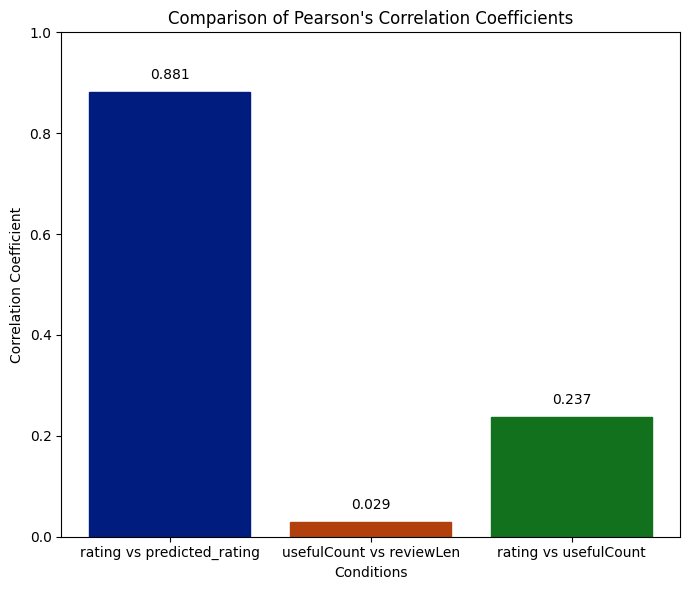

In [24]:
corrCoeff = [corrRvPR, corrUCvRL, corrRvUC]
conditions = ['rating vs predicted_rating', 'usefulCount vs reviewLen', 'rating vs usefulCount']

sns.set_palette('dark')
plt.figure(figsize=(7, 6))
bars = plt.bar(conditions, corrCoeff)
colors = sns.color_palette('dark', n_colors=len(conditions))

for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.title('Comparison of Pearson\'s Correlation Coefficients')
plt.xlabel('Conditions')
plt.ylabel('Correlation Coefficient')
plt.ylim(0, 1)

for i, v in enumerate(corrCoeff):
    plt.text(i, v + 0.02, "{:.3f}".format(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Analysis!

Coefficients: [0.8302546]
Mean squared error: 2.42
Coefficient of determination: 0.77


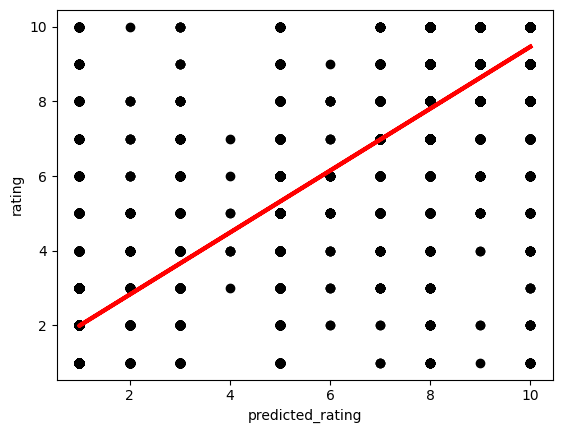

In [25]:
X = np.array(df['predicted_rating']).reshape(-1, 1)
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print("Coefficients:", regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

rSq_1 = r2_score(y_test, y_pred)
print("Coefficient of determination: %.2f" % rSq_1)


plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="red", linewidth=3)
plt.xlabel('predicted_rating')
plt.ylabel('rating')
plt.show()

Coefficients: [2.58337872]
Mean squared error: 1383.22
Coefficient of determination: 0.05


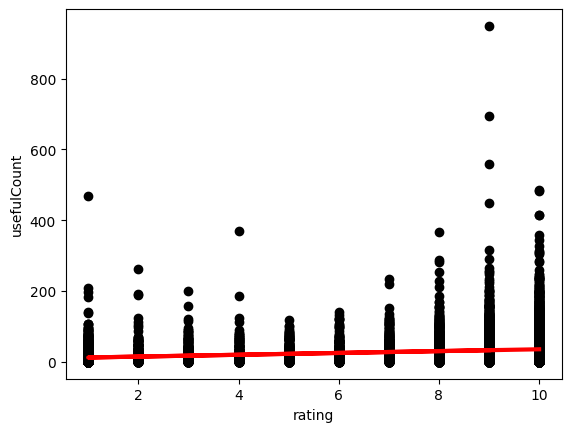

In [26]:
X = np.array(df['rating']).reshape(-1, 1)
y = df['usefulCount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print("Coefficients:", regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

rSq_2 = r2_score(y_test, y_pred)
print("Coefficient of determination: %.2f" % rSq_2)

plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="red", linewidth=3)
plt.xlabel('rating')
plt.ylabel('usefulCount')
plt.show()

Coefficients: [0.00441063]
Mean squared error: 1460.90
Coefficient of determination: 0.00


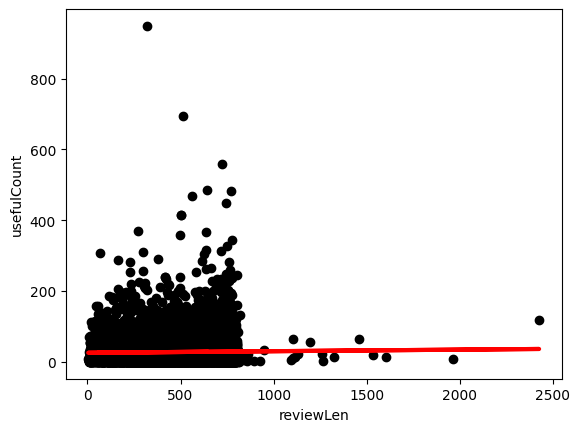

In [27]:
 X = np.array(df['reviewLen']).reshape(-1, 1)
y = df['usefulCount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print("Coefficients:", regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

rSq_3 = r2_score(y_test, y_pred)
print("Coefficient of determination: %.2f" % rSq_3)

plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="red", linewidth=3)
plt.xlabel('reviewLen')
plt.ylabel('usefulCount')
plt.show()

#### Comparing the correlation coefficients and r-sqaured values.

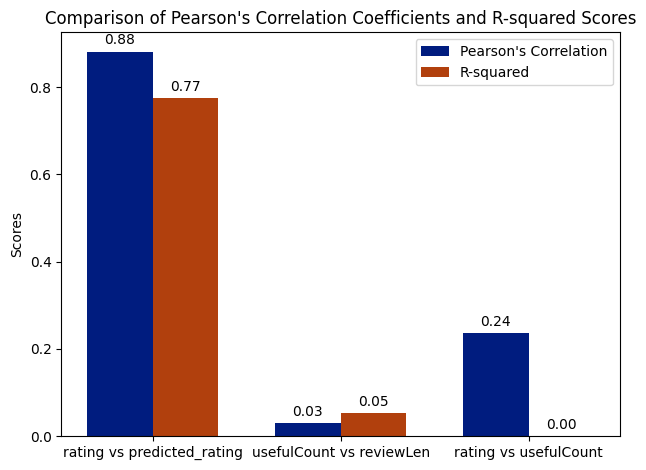

In [28]:
pearsons_correlations = [corrRvPR, corrUCvRL, corrRvUC]
r_squared_values = [rSq_1, rSq_2, rSq_3]
labels = ['rating vs predicted_rating', 'usefulCount vs reviewLen', 'rating vs usefulCount']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, pearsons_correlations, width, label='Pearson\'s Correlation')
rects2 = ax.bar(x + width/2, r_squared_values, width, label='R-squared')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Pearson\'s Correlation Coefficients and R-squared Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.2f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

#### Observations!

- **Given the strong correlation of '0.81' between our model's predicted rating ('predictedRating') and the actual rating ('rating'), along with a R Sqaured Score of '0.04' and a MSE of '10.34'.**
- **However it is important to note that our model was trained for only one epoch due to time constraints.**
- **Training the model for an additional epoch, thereby allowing it to further learn and adjust to the data, could potentially enhance its predictive accuracy.**
- **We are optimistic that with more epochs, the model would achieve even more accurate ratings, reinforcing its suitability and effectiveness as a good fit and also reducing the MSE significantly.**

- The correlation between the columns 'usefulCount' and 'rating', while being the second highest in our analysis, was relatively modest at '0.237'.
- This indicates a slight positive linear relationship between the perceived usefulness of a review and its rating. However, the linear regression model based on this relationship yielded an R Sqaured Score of 0.05 and a Mean Squared Error of '1382.22'.
- while there is some relationship between 'usefulCount' and 'rating', it is not strong enough to serve as a reliable predictor for ratings based on useful counts alone.

- As expected, the dataset featuring the weakest correlation, at a mere .029, between the columns 'reviewLen' and the 'usefulCount', resulted in an R Squared Score of '0.00' and a MSE of '1460.90'.
- Essentially, there is no discernible relationship that would allow us to predict the usefulness of a review based on its length.

#### Building the Prediction Model!

- Setting up a NLP pipeline for 'reviews'.

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
data_collator = DataCollatorWithPadding(tokenizer=tokenizer,return_tensors="tf")

accuracy = evaluate.load("accuracy")

def preprocess_function(examples):
    return tokenizer(examples['review'], truncation=True)

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

- Designing a workflow to train and evaluate a text classification model.

In [ ]:
traindf = pd.read_csv('data/drugsComTrain_raw.tsv', sep='\t')
testdf = pd.read_csv('data/drugsComTest_raw.tsv', sep='\t')
traindf['label'] = pd.Categorical(traindf.rating, ordered=True).codes
testdf['label'] = pd.Categorical(testdf.rating, ordered=True).codes

mapLabels = pd.DataFrame(traindf.groupby(['rating', 'label']).count())

label2id = mapLabels.to_dict(orient='index')
id2label = {}

for key in label2id:
    id2label[key[1]] = key[0]
    
label2id = {v: k for k, v in id2label.items()}

In [ ]:
train_ds = Dataset.from_pandas(traindf[['label', 'review']], split='train')
test_ds = Dataset.from_pandas(testdf[['label', 'review']], split='test')
tokenized_train_ds = train_ds.map(preprocess_function, batched=True)
tokenized_test_ds = test_ds.map(preprocess_function, batched=True)

In [ ]:
batch_size = 16
num_epochs = 2

batches_per_epoch = len(tokenized_train_ds) // batch_size
total_train_steps = int(batches_per_epoch * num_epochs)
optimizer, schedule = create_optimizer(init_lr=2e-5, num_warmup_steps=0,num_train_steps=total_train_steps)
model = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=10, id2label=id2label,label2id=label2id, problem_type="single_label_classification")

tf_train_set = model.prepare_tf_dataset(tokenized_train_ds,shuffle=True,batch_size=16,collate_fn=data_collator,)

tf_validation_set = model.prepare_tf_dataset(tokenized_test_ds,shuffle=False,batch_size=16,collate_fn=data_collator,)

model.compile(optimizer=optimizer)

metric_callback = KerasMetricCallback(metric_fn=compute_metrics,eval_dataset=tf_validation_set)

- Training and saving the model!

In [ ]:
model.fit(x=tf_train_set, validation_data=tf_validation_set, epochs=1,callbacks=metric_callback)

In [ ]:
model.save_pretrained('my_predictor')

In [ ]:
classifier = pipeline('sentiment-analysis', model='my_predictor',tokenizer=tokenizer, device=0)


In [ ]:
results = []
for out in tqdm(classifier(KeyDataset(tokenized_test_ds, 'review'),batch_size=8, truncation="only_first"), total=len(tokenized_test_ds)):
    results.append(out)

df = pd.DataFrame(results)

df.columns = ['predicted_rating', 'score']
testdf = pd.concat([testdf, df], axis=1)
testdf.to_csv("C://Users//rtpn2//OneDrive//Desktop//WinterQ24//Machine Learning//Project//drugReviewAnalysis//drugReviewAnalysis//predicted_test.csv")

#### Key Learnings!
- One of the key learnings from this project is the significant investmet of time required for training machine learning models, especially when working with large datasets and complex models like these used for natural language processing tasks.
- Training time is a crucial element in machine learning model development.
- The initial training phase demonstrated a strong correlation between predicted and actual ratings, validating our model's effectiveness. Encouraged by these results, we're advancing to a second epoch of training, optimistic that it will definitely further enhance model accuracy.